In [444]:
import pandas as pd
import re
import datetime


q_df = pd.read_csv('Quitters_with_seniority.csv')
nq_df = pd.read_csv('NonQuitters_with_seniority.csv')


columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0']
q_df = q_df.drop(columns_to_drop, axis=1)
nq_df = nq_df.drop(columns_to_drop, axis=1)

/var/folders/74/37xhv12j1_b0bpxcvmn65x_h0000gn/T/ipykernel_97963/2302526472.py:6: DtypeWarning: Columns (73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100) have mixed types. Specify dtype option on import or set low_memory=False.
  q_df = pd.read_csv('Quitters_with_seniority.csv')
/var/folders/74/37xhv12j1_b0bpxcvmn65x_h0000gn/T/ipykernel_97963/2302526472.py:7: DtypeWarning: Columns (73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100) have mixed types. Specify dtype option on import or set low_memory=False.
  nq_df = pd.read_csv('NonQuitters_with_seniority.csv')


In [447]:
# Calculate total working experience in months
q_df['total_experience'] = q_df[['time_duration_1', 'time_duration_2', 'time_duration_3', 'time_duration_4',
                             'time_duration_5', 'time_duration_6', 'time_duration_7', 'time_duration_8',
                             'time_duration_9', 'time_duration_10']].sum(axis=1)

nq_df['total_experience'] = nq_df[['time_duration_1', 'time_duration_2', 'time_duration_3', 'time_duration_4',
                             'time_duration_5', 'time_duration_6', 'time_duration_7', 'time_duration_8',
                             'time_duration_9', 'time_duration_10']].sum(axis=1)


In [448]:
def normalize_education_years(df):
    """Normalizes education years into YYYY-YYYY format.

    Args:
      df: The DataFrame containing the ed_time_duration columns.

    Returns:
      A new DataFrame with the normalized education years.
    """

    #pattern = r'\b(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\b'
    pattern = r'[a-zA-Z]'
    
    # Create a function to normalize a single education year.
    def normalize_education_year(year):
        if year == 'Present':
            return str(datetime.datetime.now().year)
        elif year == '':
            return None
        elif (re.search(pattern, str(year))):
            return None
        else:
            return year

  # Loop through the rows in the DataFrame.
    for index, row in df.iterrows():
        # Normalize each education year.
        for col in ['ed_time_duration_1', 'ed_time_duration_2', 'ed_time_duration_3']:
            df.loc[index, col] = normalize_education_year(row[col])

    return df

q_df = normalize_education_years(q_df)
nq_df = normalize_education_years(nq_df)


In [434]:
#q_df[['ed_time_duration_1','ed_time_duration_2','ed_time_duration_3','total_experience']][:10]
#q_df['ed_time_duration_1'][1][-4:]

In [449]:
def check_exp(q_df):

    # Extract graduation years
    q_df['grad_year_1'] = q_df['ed_time_duration_1'].str.split(' - ').str[1].astype(float)
    q_df['grad_year_2'] = q_df['ed_time_duration_2'].str.split(' - ').str[1].astype(float)
    q_df['grad_year_3'] = q_df['ed_time_duration_3'].str.split(' - ').str[1].astype(float)

    # Find the earliest valid graduation year
    valid_grad_years = q_df[['grad_year_1', 'grad_year_2', 'grad_year_3']].stack().dropna()
    if valid_grad_years.empty:
        # Handle case when all graduation years are missing or invalid
        q_df['exp check'] = 0
    else:
        earliest_grad_year = valid_grad_years.min()

        # Calculate number of months from earliest graduation year until now
        current_year = datetime.datetime.now().year
        current_month = datetime.datetime.now().month
        months_since_graduation = (current_year - earliest_grad_year) * 12 + current_month

        # Compare with total_experience
        q_df['exp_check'] = q_df['total_experience'].apply(lambda x: 1 if x > months_since_graduation else 0)

        return q_df


In [450]:
q_df = check_exp(q_df)
nq_df = check_exp(nq_df)

In [461]:
print('# of Quitters failed check: ', sum(q_df['exp_check']==1))
print('# of NonQuitters failed check: ', sum(nq_df['exp_check']==1))

# of Quitters failed check:  56
# of NonQuitters failed check:  25


In [462]:
#q_df[['ed_time_duration_1','ed_time_duration_2','ed_time_duration_3','total_experience','exp_check']][:55]

In [465]:
for i in q_df.columns:
    print(i)

profile_url
First Name
Middle Name
Surname
Linkedin_url
connections
Summary
Skills
education level
title_1
company_1
time_duration_1
Job_Description_1
title_2
company_2
time_duration_2
Job_Description_2
title_3
company_3
time_duration_3
Job_Description_3
title_4
company_4
time_duration_4
Job_Description_4
title_5
company_5
time_duration_5
Job_Description_5
title_6
company_6
time_duration_6
Job_Description_6
title_7
company_7
time_duration_7
Job_Description_7
title_8
company_8
time_duration_8
Job_Description_8
title_9
company_9
time_duration_9
Job_Description_9
title_10
company_10
time_duration_10
Job_Description_10
school_name_1
ed_time_duration_1
degree_name_1
education_fos_1
school_name_2
ed_time_duration_2
degree_name_2
education_fos_2
school_name_3
ed_time_duration_3
degree_name_3
education_fos_3
Unnamed: 1
Unnamed: 2
Unnamed: 3
Unnamed: 4
Unnamed: 5
Unnamed: 6
Unnamed: 7
Unnamed: 8
Unnamed: 9
Unnamed: 10
Country
State
City
job 1 location
job 2 location
job 3 location
job 4 locatio

In [454]:
q_df = q_df.drop(['grad_year_1', 'grad_year_2', 'grad_year_3'], axis=1)
nq_df = nq_df.drop(['grad_year_1', 'grad_year_2', 'grad_year_3'], axis=1)


In [466]:
print(q_df.shape)
print(nq_df.shape)

(19996, 108)
(173355, 108)


In [467]:
#write out files with 'total_experience and 'exp_check'

quitters_out = 'Quitters_with_total_exp.csv'
q_df.to_csv(quitters_out, index=False)

nonquitters_out = 'NonQuitters_with_total_exp.csv'
nq_df.to_csv(nonquitters_out, index=False)

## Work Duration Binning

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('new_combined_with_text_data.csv')

/var/folders/74/37xhv12j1_b0bpxcvmn65x_h0000gn/T/ipykernel_48123/128456750.py:4: DtypeWarning: Columns (61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('new_combined_with_text_data.csv')


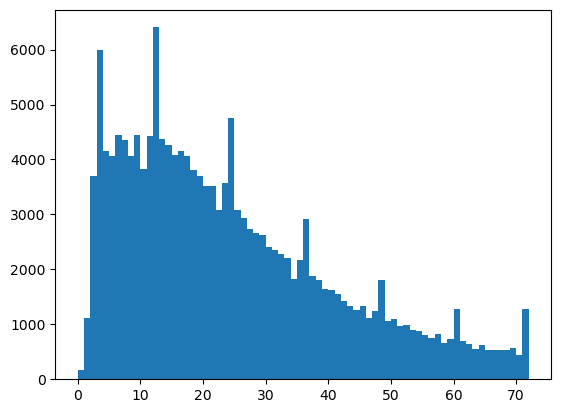

In [13]:
import matplotlib.pyplot as plt

plt.hist(df['time_duration_2'],bins = 72, range = (0,72))
plt.show()

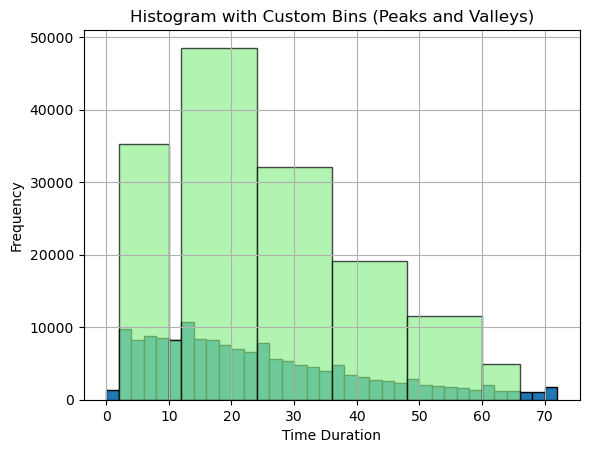

In [64]:
# Define the number of bins and range for the histogram
#num_bins = int(np.sqrt(len(data['time_duration_2'])))
#bin_width = 3.5 * np.std(data['time_duration_2']) / (len(data['time_duration_2'])**(1/3))
#num_bins = int((bin_range[1] - bin_range[0]) / bin_width)


num_bins = 36
bin_range = (0, 72)
data= df

hist, bins, _ = plt.hist(data['time_duration_2'], bins=num_bins, range=bin_range, edgecolor='black')

# Find the peaks and valleys in the histogram
peaks = [bins[i] for i in range(1, len(hist) - 1) if hist[i - 1] < hist[i] > hist[i + 1] and 
        hist[i - 2] < hist[i] > hist[i + 2]]
valleys = [bins[i] for i in range(1, len(hist) - 1) if hist[i - 1] > hist[i] < hist[i + 1] and 
          hist[i - 2] > hist[i] < hist[i + 2]]

cut_points = np.unique(np.concatenate((peaks, valleys)))
cut_points.sort()

# Use pandas.cut to assign bins based on the cut points
data['bins'] = pd.cut(data['time_duration_2'], bins=cut_points, labels=False, include_lowest=True)

# Create a new figure and adjust the size
#plt.figure(figsize=(8, 6))

# Plot the histogram with the bins, and color the bars differently
plt.hist(data['time_duration_2'], bins=cut_points, color='lightgreen', edgecolor='black', alpha=0.7)

# Add grid lines for better readability
plt.grid(True)

# Label the axes and add a title to the histogram
plt.xlabel('Time Duration')
plt.ylabel('Frequency')
plt.title('Histogram with Custom Bins (Peaks and Valleys)')

# Display the histogram plot
plt.show()


In [65]:
df[['time_duration_2','bins']][:20]

,time_duration_2,bins
0,1.0,NaN
1,23.0,2.0
2,13.0,2.0
3,9.0,0.0
4,7.0,0.0
5,34.0,3.0
6,12.0,1.0
7,12.0,1.0
8,25.0,3.0
9,45.0,4.0
